In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
df = pd.read_csv("Airbnb_Data.csv")


In [18]:
df.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0


In [19]:
df.columns

Index(['id', 'log_price', 'property_type', 'room_type', 'amenities',
       'accommodates', 'bathrooms', 'bed_type', 'cancellation_policy',
       'cleaning_fee', 'city', 'description', 'first_review',
       'host_has_profile_pic', 'host_identity_verified', 'host_response_rate',
       'host_since', 'instant_bookable', 'last_review', 'latitude',
       'longitude', 'name', 'neighbourhood', 'number_of_reviews',
       'review_scores_rating', 'thumbnail_url', 'zipcode', 'bedrooms', 'beds'],
      dtype='object')

# checking missing value

In [20]:
print(df.isnull().sum())

id                            0
log_price                     0
property_type                 0
room_type                     0
amenities                     0
accommodates                  0
bathrooms                   200
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
description                   0
first_review              15864
host_has_profile_pic        188
host_identity_verified      188
host_response_rate        18299
host_since                  188
instant_bookable              0
last_review               15827
latitude                      0
longitude                     0
name                          0
neighbourhood              6872
number_of_reviews             0
review_scores_rating      16722
thumbnail_url              8216
zipcode                     966
bedrooms                     91
beds                        131
dtype: int64


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      74111 non-null  int64  
 1   log_price               74111 non-null  float64
 2   property_type           74111 non-null  object 
 3   room_type               74111 non-null  object 
 4   amenities               74111 non-null  object 
 5   accommodates            74111 non-null  int64  
 6   bathrooms               73911 non-null  float64
 7   bed_type                74111 non-null  object 
 8   cancellation_policy     74111 non-null  object 
 9   cleaning_fee            74111 non-null  bool   
 10  city                    74111 non-null  object 
 11  description             74111 non-null  object 
 12  first_review            58247 non-null  object 
 13  host_has_profile_pic    73923 non-null  object 
 14  host_identity_verified  73923 non-null

# handling missing values

In [22]:
df['last_review'] = pd.to_datetime(df['last_review'], errors= 'coerce')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id                      74111 non-null  int64         
 1   log_price               74111 non-null  float64       
 2   property_type           74111 non-null  object        
 3   room_type               74111 non-null  object        
 4   amenities               74111 non-null  object        
 5   accommodates            74111 non-null  int64         
 6   bathrooms               73911 non-null  float64       
 7   bed_type                74111 non-null  object        
 8   cancellation_policy     74111 non-null  object        
 9   cleaning_fee            74111 non-null  bool          
 10  city                    74111 non-null  object        
 11  description             74111 non-null  object        
 12  first_review            58247 non-null  object

In [24]:
df.fillna({'review_scores_rating' : 0, 'last_review' : df['last_review'].min()}, inplace=True)

In [25]:
df.dropna(subset= ['name', 'neighbourhood'], inplace=True)

In [26]:
print(df.isnull().sum())

id                            0
log_price                     0
property_type                 0
room_type                     0
amenities                     0
accommodates                  0
bathrooms                   193
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
description                   0
first_review              14096
host_has_profile_pic        185
host_identity_verified      185
host_response_rate        17335
host_since                  185
instant_bookable              0
last_review                   0
latitude                      0
longitude                     0
name                          0
neighbourhood                 0
number_of_reviews             0
review_scores_rating          0
thumbnail_url              7262
zipcode                     579
bedrooms                     81
beds                        113
dtype: int64


In [27]:
df = df.drop(columns=["description", "thumbnail_url"], errors='ignore')

In [28]:
df.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,2016-07-18,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,2017-09-23,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,2017-09-14,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,2009-01-21,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,0.0,94117.0,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,2017-01-22,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,20009,0.0,1.0


## Remove Duplicates

In [29]:
df.drop_duplicates(inplace=True)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 67239 entries, 0 to 74110
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id                      67239 non-null  int64         
 1   log_price               67239 non-null  float64       
 2   property_type           67239 non-null  object        
 3   room_type               67239 non-null  object        
 4   amenities               67239 non-null  object        
 5   accommodates            67239 non-null  int64         
 6   bathrooms               67046 non-null  float64       
 7   bed_type                67239 non-null  object        
 8   cancellation_policy     67239 non-null  object        
 9   cleaning_fee            67239 non-null  bool          
 10  city                    67239 non-null  object        
 11  first_review            53143 non-null  object        
 12  host_has_profile_pic    67054 non-null  object     

# descriptive statistics

In [31]:
df.describe()

,id,log_price,accommodates,bathrooms,last_review,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
count,6.723900e+04,67239.000000,67239.000000,67046.000000,67239,67239.000000,67239.000000,67239.000000,67239.000000,67158.000000,67126.000000
mean,1.126689e+07,4.798970,3.134267,1.228522,2015-07-04 10:34:20.768304384,38.758922,-90.544014,21.460328,73.235503,1.260833,1.702440
min,9.410000e+02,0.000000,1.000000,0.000000,2009-01-21 00:00:00,33.705835,-122.511500,0.000000,0.000000,0.000000,0.000000
25%,6.262404e+06,4.317488,2.000000,1.000000,2015-10-27 00:00:00,34.213493,-118.329868,1.000000,80.000000,1.000000,1.000000
50%,1.225412e+07,4.744932,2.000000,1.000000,2017-04-13 00:00:00,40.681279,-74.000464,6.000000,94.000000,1.000000,1.000000
75%,1.640238e+07,5.241747,4.000000,1.000000,2017-08-31 00:00:00,40.753167,-73.951420,24.000000,99.000000,1.000000,2.000000
max,2.123090e+07,7.600402,16.000000,8.000000,2017-10-05 00:00:00,42.390437,-70.985047,542.000000,100.000000,10.000000,18.000000
std,6.079879e+06,0.710094,2.119001,0.570889,NaN,2.948197,21.420181,38.591495,39.658555,0.846762,1.236807


# visualization

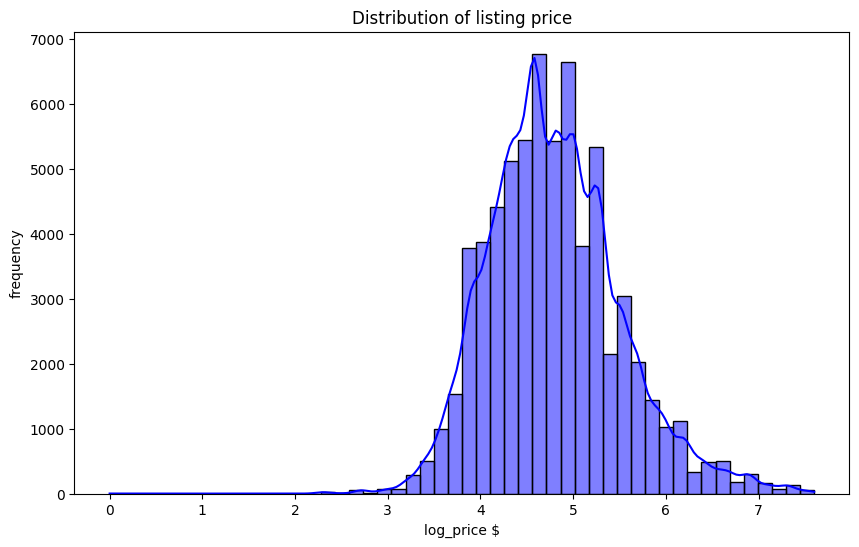

In [32]:
plt.figure(figsize=(10,6))
sns.histplot(df['log_price'], bins=50, kde=True, color='blue')
plt.title("Distribution of listing price")
plt.xlabel("log_price $")
plt.ylabel("frequency")
plt.show()


 # How Are different room types distributed

In [33]:
df['room_type']

0        Entire home/apt
1        Entire home/apt
2        Entire home/apt
3        Entire home/apt
4        Entire home/apt
              ...       
74106       Private room
74107    Entire home/apt
74108    Entire home/apt
74109    Entire home/apt
74110    Entire home/apt
Name: room_type, Length: 67239, dtype: object

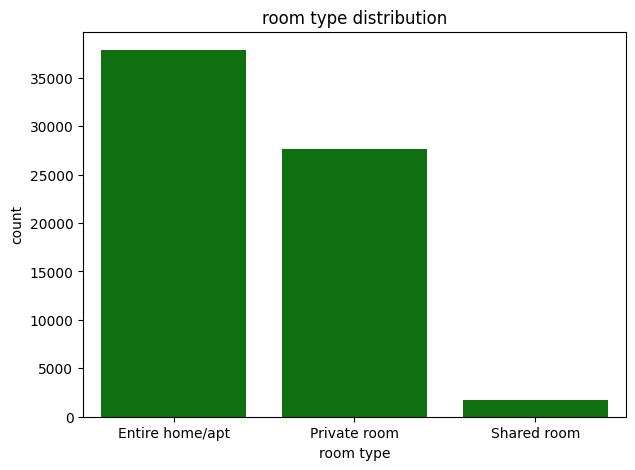

In [34]:
plt.figure(figsize=(7,5))
sns.countplot(x= "room_type", data=df, color="green")
plt.title("room type distribution")
plt.xlabel("room type")
plt.ylabel("count")
plt.show()

# how are listings distributed across different neighbourhood

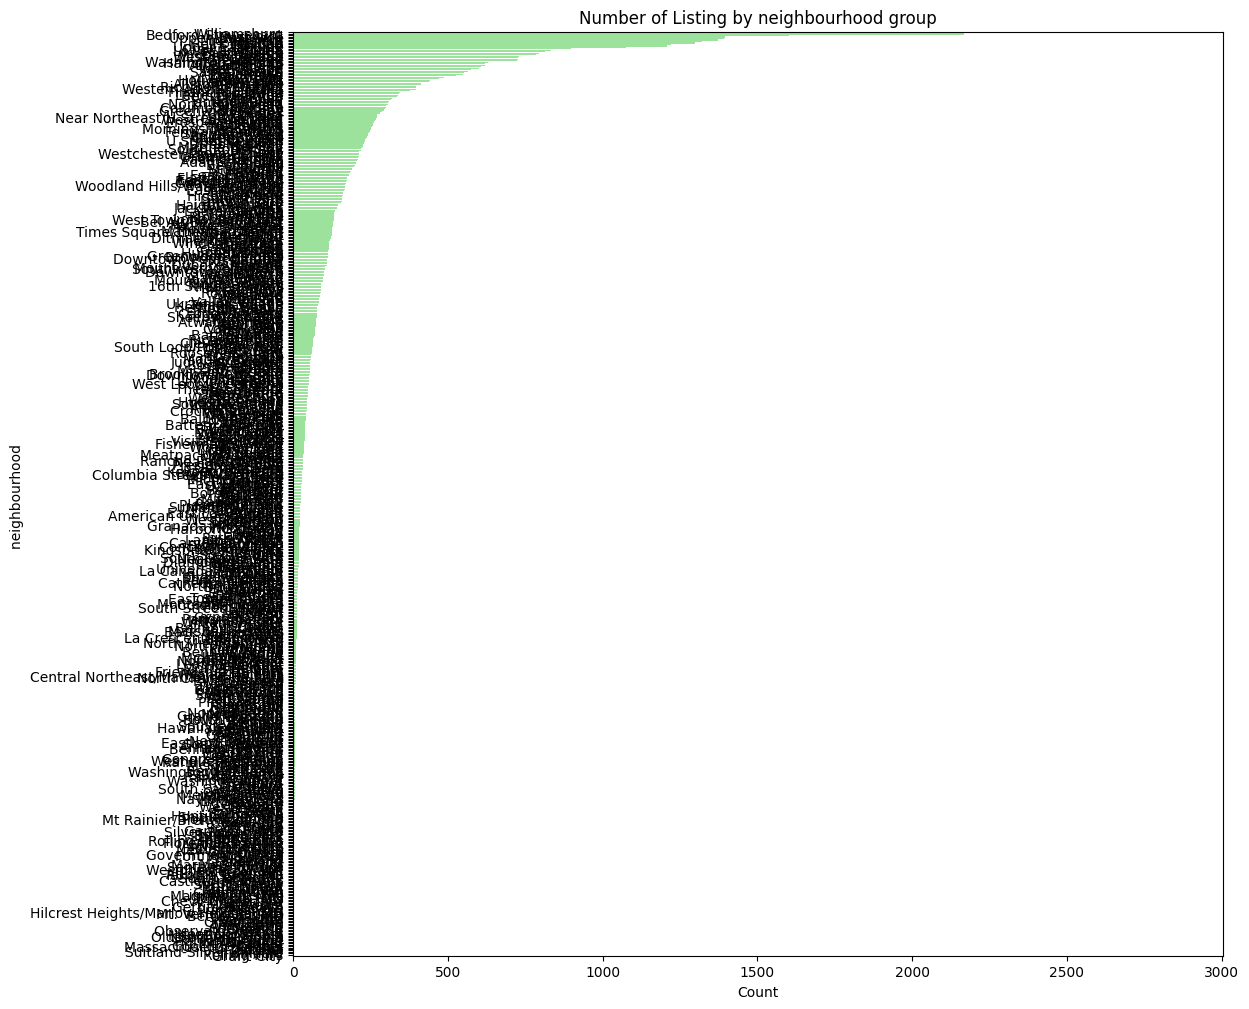

In [36]:
plt.figure(figsize=(12, 12))
sns.countplot(y = "neighbourhood", data=df, color="lightgreen", order=df['neighbourhood'].value_counts().index)
plt.title("Number of Listing by neighbourhood group")
plt.xlabel("Count")
plt.ylabel("neighbourhood ")
plt.show();

# relationship between price and room type

C:\Users\mukes\AppData\Local\Temp\ipykernel_3016\1806821124.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='room_type')


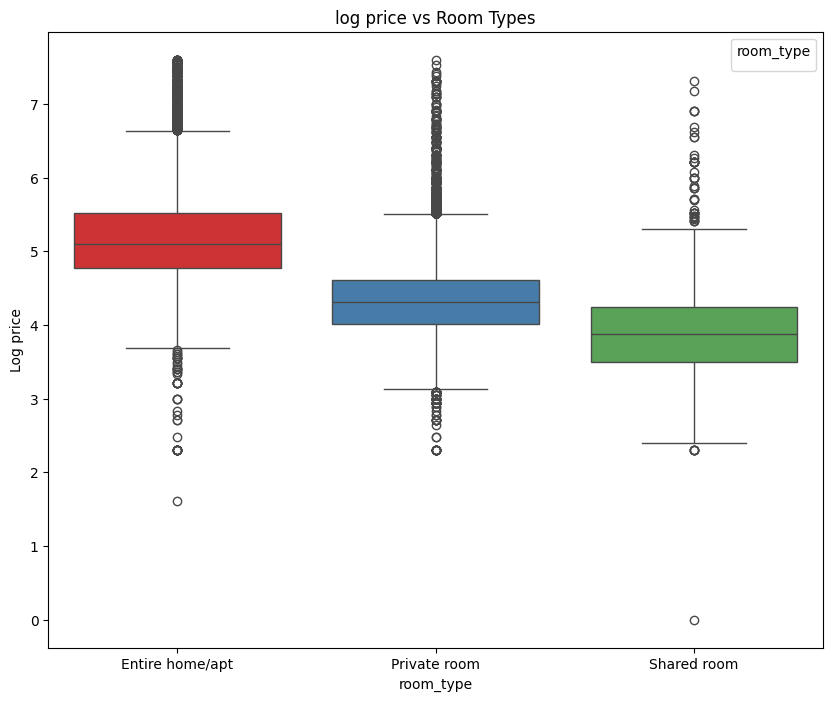

In [37]:
plt.figure(figsize=(10,8))
sns.boxplot(x='room_type', y='log_price', hue='room_type', data=df, palette='Set1')
plt.title('log price vs Room Types')
plt.xlabel("room_type")
plt.ylabel("Log price")
plt.legend(title='room_type')
plt.show()

In [39]:
df['last_review'] = pd.to_datetime[df['last_review']]
reviews_over_time = df.groupby(df['last_review'].dt.to_period('M').size())

plt.figure(figsize=(12,6))
reviews_over_time.plot(kind='line', color='green')
plt.title("number of reviews over time")
plt.xlabel("date")
plt.ylabel("number of review")
plt.show()

TypeError: 'function' object is not subscriptable